### Student Name: Vipul Popat
### Student ID: 18195121

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(n_samples=1000, noise = 0.05)
y = [yy if yy == 1 else -1 for yy in y] 

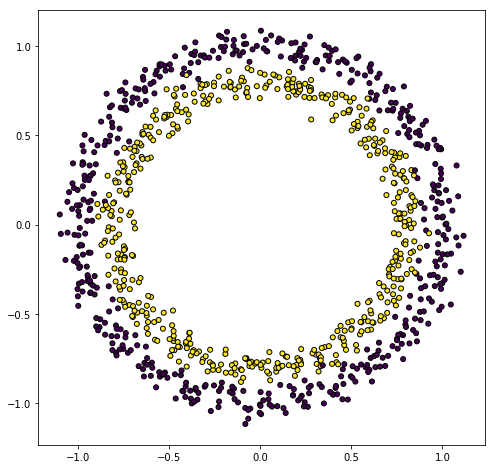

In [3]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')
plt.show()

In [4]:
print(X.shape)

(1000, 2)


In [5]:
X

array([[-0.12075238, -0.99427057],
       [-0.46969175, -0.70236362],
       [-0.82715435, -0.48599847],
       ...,
       [-0.64133261, -0.80806345],
       [ 0.96089895, -0.20666315],
       [-0.97390064,  0.33519999]])

In [6]:
class LinearClassification(object):
    """ Perceptron Classifier

    Parameters
    ------------
    rate : float
        Learning rate (ranging from 0.0 to 1.0)
    number_of_iteration : int
        Number of iterations over the input dataset.

    Attributes:
    ------------

    weight_matrix : 1d-array
        Weights after fitting.

    errors_list : list
        Number of misclassification in every epoch(one full training cycle on the training set)

    """

    def fit(self, X, y):

        self.weight_matrix = np.zeros(1 + X.shape[1])

        pseudo_inv_matrix = np.linalg.pinv(X)
        self.weight_matrix = pseudo_inv_matrix.dot(y)

    def dot_product(self, X):
        """ Calculate the dot product """
        print("weights=",self.weight_matrix.shape)
        print("X=", X.shape)
        return (np.dot(np.transpose(self.weight_matrix), X))

    def predict(self, X):
        """ Predicting the label for the input data """
        return np.sign(self.dot_product(X))


In [7]:
p = LinearClassification()
p.fit(X, np.array(y))
test_x = [-0.75028319, -0.57692659]
print("Predicting the output of [-0.75028319, -0.57692659] = {}".format(p.predict(np.array(test_x))))
print("Weight matrix = ", p.weight_matrix)


weights= (2,)
X= (2,)
Predicting the output of [-0.75028319, -0.57692659] = 1.0
Weight matrix =  [-0.00082259 -0.00794668]


### Conclusions
- As seen from the scatter plot above, the data points are not linearly separable. Hence a LinearClassification alogorithm is going to perform very badly in this case.
- The error_list indicates above that only the alogorithm has a very high error rate i.e. 1 out of 2 samples are wrong classified which was expected in any case